# **Classificação de Flores Iris com Scikit-learn**

Data: 16/09 - Autor: Eduardo Oliveira  

## **Carregamento das Bibliotecas e do Dataset**

In [ ]:
# Import das biliotecas de ciência de dados
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
# Carregua o dataset como um DataFrame do Pandas para facilitar a manipulação
iris = load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Adiciona a coluna 'species' ao DataFrame com os nomes das espécies correspondentes aos targets
df_iris['species'] = iris.target_names[iris.target]

## **Análise Exploratória de Dados (EDA)** 

In [194]:
# Exibe as primeiras linhas do DataFrame para visualização inicial dos dados
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [195]:
# Exibe informações sobre o DataFrame, incluindo tipos de dados e valores nulos
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [196]:
# Exibe o formato (número de linhas e colunas) do DataFrame
df_iris.shape

(150, 5)

In [197]:
# Verifica a soma de valores nulos em cada coluna do DataFrame df_iris
df_iris.isnull().sum()


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

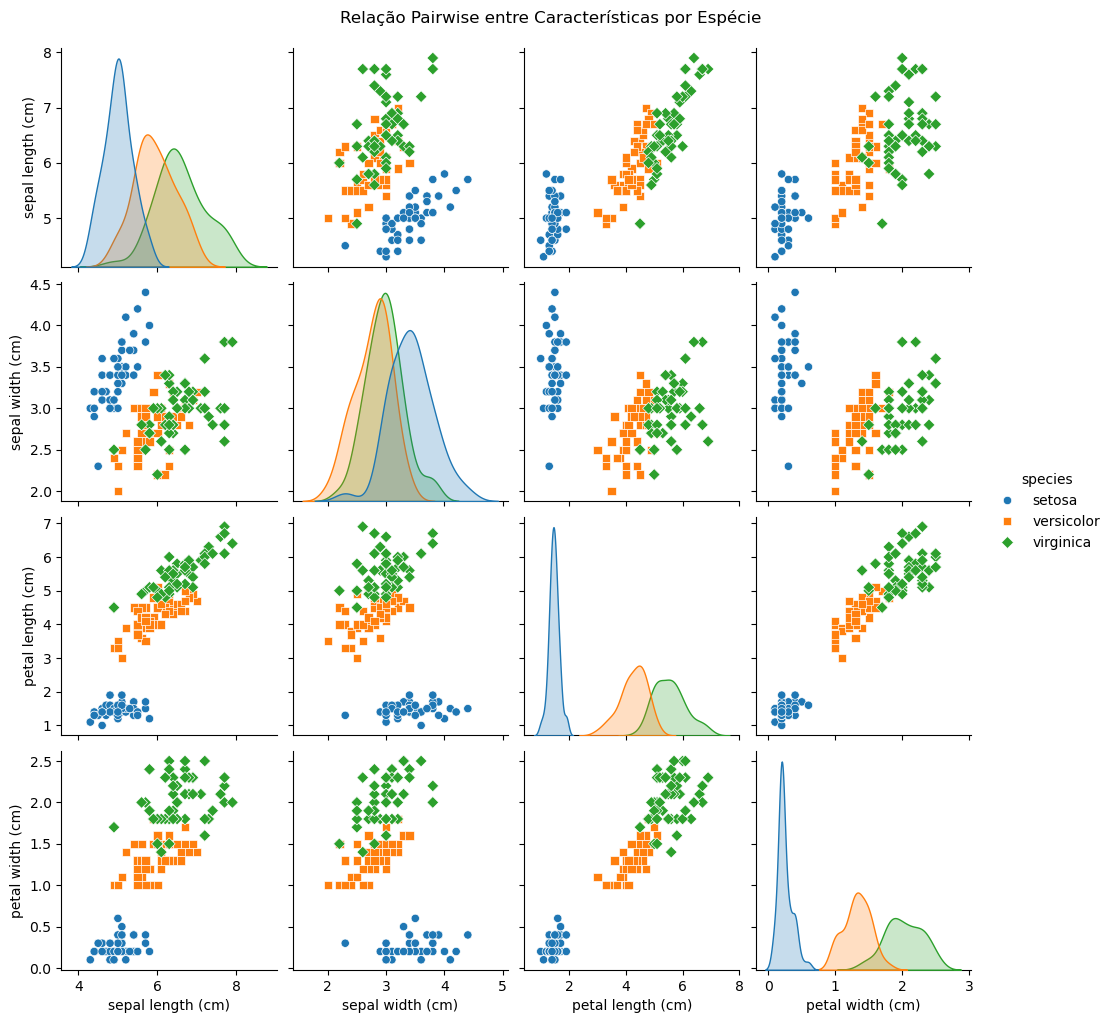


Distribuição das espécies:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [198]:
# Visualizando a relação entre as características, colorindo por espécie
sns.pairplot(df_iris, hue='species', markers=['o', 's', 'D'])
plt.suptitle('Relação Pairwise entre Características por Espécie', y=1.02)
plt.show()

# Verificando o balanceamento das classes
print("\nDistribuição das espécies:")
print(df_iris['species'].value_counts())

## **Preparação dos Dados**

In [199]:
# Seleciona as colunas de características (features) removendo a coluna 'species'
features = df_iris.drop('species', axis=1)
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [200]:
# Seleciona a coluna 'species' como variável alvo (target)
target = df_iris['species']
target.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [201]:
# Dividindo os dados em conjuntos de treino e teste (80% treino, 20% teste)
caracteristicas_treino, caracteristicas_test, classes_treino, classes_test = train_test_split(features, target, test_size=0.20, random_state=42)

## **Modelagem e Treinamento**

In [202]:
# Criando um modelo de classificação para treinar algoritmo Random Forest
modelo_rf = RandomForestClassifier()
modelo_rf.fit(caracteristicas_treino, classes_treino)

RandomForestClassifier()

In [203]:
# Fazendo algumas previsões
previsoes = modelo_rf.predict(caracteristicas_test)
previsoes
  

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

## **Avaliação do Modelo**

In [204]:
# Avaliar o modelo gerado
acuracia = accuracy_score(classes_test, previsoes)
print("Acurácia do modelo:", acuracia)
print(classification_report(classes_test, previsoes))

Acurácia do modelo: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## **Conclusão**

 A acurácia deu 100%, o que significa que houve overfitting (os dados foram decorados, e não aprendidos). Uma possível solução seria aumentar a quantidade de dados para treino, acrescentando novas features do dataset.